In [6]:
from glob import glob
#import .loader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import re
import os

*** /home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0*/fake_see ***
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*** /home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0*/fake_nosee ***
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*** /home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0*/nofake_see ***
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


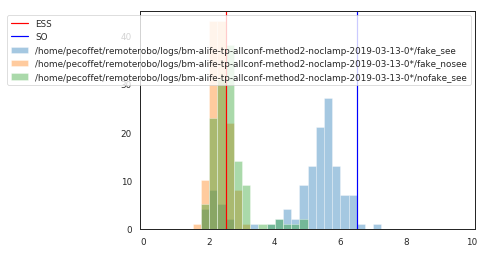

3


In [9]:
megaconds = ['/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0*/fake_see',
             '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0*/fake_nosee',
             '/home/pecoffet/remoterobo/logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0*/nofake_see']

gen = 9999
autogen = gen == 0

megaresults = dict()
for group in megaconds:
    allmeans = np.array([])
    conds = sorted(list(glob(group+'/**/rep00', recursive=True)))
    means = np.array([], dtype=float)
    print("***", group, "***")
    for cond in conds:
        if autogen:
            try:
                gen = max([int(re.search('genomes_(\d+)', fname).group(1)) for fname in glob(join(cond, 'genomes*'))])
                stop = False
            except ValueError:
                print("not enough gen")
                stop = True
            if stop: continue
        with open(cond + f'/genomes_{gen}.txt') as f:
            try:
                dat = np.asarray(json.load(f))
            except json.JSONDecodeError:
                continue
        with open(glob(cond + '/properties*')[0]) as f:
            props = f.read()
            maxcoop = float(re.search('maxCoop=(.*)', props).group(1))
        means = dat[:, 0] * maxcoop
        if False:
            print(cond)
            plt.figure()
            sns.distplot(means)
            plt.axvline(2.5, label="ESS", c="r")
            plt.axvline(6.5, label="SO", c="b")
            plt.legend()
            plt.xlim(-0.1, maxcoop)
            plt.title(cond)
            plt.show()
        allmeans = np.concatenate((allmeans, np.array([np.median(means)])))
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
    if False:
        plt.figure()
        sns.distplot(allmeans, label=os.path.basename(group), bins=np.arange(0, maxcoop, 0.5), kde=False)
        plt.xlim(-0.1, maxcoop)
        plt.show()
    megaresults[group] = allmeans

fig, ax = plt.subplots(1,1)
for i, (name, megaresult) in enumerate(megaresults.items()):
    sns.distplot(megaresult, label=name, bins=np.arange(0, 10, 0.25), ax=ax, kde=False)
    ax.set_xlim(-0.1, 10.1)
ax.axvline(2.5, label="ESS", c="r")
ax.axvline(6.5, label="SO", c="b")
ax.legend()
plt.show(fig)

print(len(megaresults))

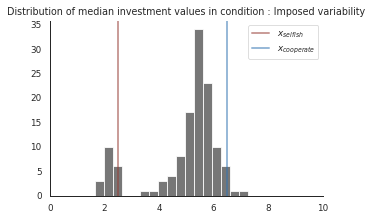

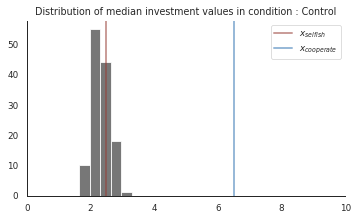

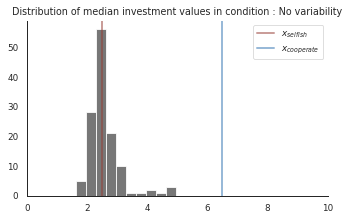

In [15]:
plosrcparams = {'backend': 'pdf',
                'axes.labelsize': 9,
                'xtick.labelsize': 9,
                'ytick.labelsize': 9,
                'legend.fontsize': 9,
                'lines.markersize': 3,
                'font.size': 9,
                'font.family': u'sans-serif',
                'font.sans-serif': ['Arial'],
                'text.usetex': False}

import matplotlib as mpl

mpl.rcParams.update(plosrcparams)
sns.set_context('paper')
sns.set_style('white')


labels = {'fake_nosee': 'Control', 'fake_see': 'Imposed variability', 'nofake_see': 'No variability'}
for i, (name, megaresult) in enumerate(megaresults.items()):
    fig, axs = plt.subplots(1, 1, figsize=(5.1, 5.1/1.62 * 1))
    sns.distplot(megaresult, bins=np.arange(0, 10, 0.33), ax=axs, kde=False, color="#777777", hist_kws={'alpha': 1})
    axs.set_xlim(0, 10)
    axs.set_title(f"Distribution of median investment values in condition : {labels.get(os.path.basename(name), os.path.basename(name))}")
    axs.axvline(2.5, label="$x_{selfish}$", c="#963d35", linewidth=2, alpha=0.5)
    axs.axvline(6.5, label="$x_{cooperate}$", c="#3375b2", linewidth=2, alpha=0.5)
    axs.legend()
    sns.despine()
    fig.tight_layout()
    plt.savefig(f'../Results/coop_from_genome_{os.path.basename(name)}.pdf')
    plt.show()